# 모듈 임포트

In [70]:
import sys,os
import importlib
current_directory_ipynb = os.getcwd()
parent_directory = os.path.dirname(current_directory_ipynb) # 현재 스크립트 파일의 디렉토리 경로 (상위 디렉토리)를 계산
sys.path.append(parent_directory)
import path_ipynb
importlib.reload(path_ipynb)
import eKoNL as ek
importlib.reload(ek)
import LDA
importlib.reload(LDA)
import pandas as pd
import mecab_pro as mp
importlib.reload(mp)
import warnings
warnings.filterwarnings("ignore")
# # import Lasso
# importlib.reload(Lasso)
data_path = parent_directory + "\\data"
import analyze_process
importlib.reload(analyze_process)

# current_path = os.getcwd() #현 디렉토리
# parent_path = os.path.dirname(current_path) #project_stock_volume
# sys.path.append(parent_path)
# import path


# from text_preprocess import eKoNL as ek
# from LDA_process import LDA
# importlib.reload(ek)
# importlib.reload(LDA)

['c:\\Users\\서울디지털인재개발원\\PycharmProjects\\project_stock_volume\\Execution', 'c:\\Users\\서울디지털인재개발원\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'c:\\Users\\서울디지털인재개발원\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', 'c:\\Users\\서울디지털인재개발원\\AppData\\Local\\Programs\\Python\\Python311\\Lib', 'c:\\Users\\서울디지털인재개발원\\AppData\\Local\\Programs\\Python\\Python311', '', 'C:\\Users\\서울디지털인재개발원\\AppData\\Roaming\\Python\\Python311\\site-packages', 'C:\\Users\\서울디지털인재개발원\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32', 'C:\\Users\\서울디지털인재개발원\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32\\lib', 'C:\\Users\\서울디지털인재개발원\\AppData\\Roaming\\Python\\Python311\\site-packages\\Pythonwin', 'c:\\Users\\서울디지털인재개발원\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages', 'c:\\Users\\서울디지털인재개발원\\PycharmProjects\\project_stock_volume', 'c:\\Users\\서울디지털인재개발원\\PycharmProjects\\project_stock_volume\\.git', 'c:\\Users\\서울디지털인재개발원\\PycharmProjects\\project_sto

<module 'analyze_process' from 'c:\\Users\\서울디지털인재개발원\\PycharmProjects\\project_stock_volume\\Model\\analyze_process.py'>

# LDA진행

## 데이터 불러오기

In [71]:
def report_preprocess(df):
    df.rename(columns={'Report': 'Content'}, inplace=True)

    # 'Content' 칼럼의 개행문자 제거
    df['Content'] = df['Content'].str.replace('\n', '').str.replace('\t', '')

    # 'Date' 칼럼의 데이터 형식을 datetime으로 변환
    df['Date'] = '20' + df['Date']
    df['Date'] = pd.to_datetime(df['Date'])
    return df[['Date','Content','stock']]

In [72]:
#리포트 불러오기
car_report = pd.read_csv(data_path+"\\자동차_combined_report.csv")
car_report['stock'] = '현대차'
semiconduct_report = pd.read_csv(data_path+"\\반도체_combined_report.csv")
semiconduct_report['stock'] = '삼성전자'
bio_report = pd.read_csv(data_path+"\\바이오_combined_report.csv")
bio_report['stock'] = '셀트리온'

#뉴스기사 불러오기
hyundai = pd.read_excel(data_path + "\\현대차_20040101_20221231.xlsx")
hyundai = hyundai[['Date','Content','stock']]
hyundai['Date'] = pd.to_datetime(hyundai['Date'])
samsung = pd.read_excel(data_path + "\\삼성전자_20120101_20221231.xlsx")
samsung = samsung[['Date','Content','stock']]
samsung['Date'] = pd.to_datetime(samsung['Date'])
celltrion = pd.read_excel(data_path + "\\셀트리온_20120101_20221231.xlsx")
celltrion = celltrion[['Date','Content','stock']]
celltrion['Date'] = pd.to_datetime(celltrion['Date'])

# 주가데이터 불러오기
car = pd.read_csv(data_path + "\\car_combined.csv")
car = car.drop(columns=['Unnamed: 0'])
bio = pd.read_csv(data_path + "\\bio_combined.csv")
bio = bio.drop(columns=['Unnamed: 0'])
semiconduct = pd.read_csv(data_path + "\\semiconductor_combined.csv")
semiconduct = semiconduct.drop(columns=['Unnamed: 0'])
filter_condition = (semiconduct['stock'] == '삼성전자') & (semiconduct['Date'] < '2018-05-04')
filtered_indices = semiconduct.index[filter_condition]
semiconduct.loc[filtered_indices, 'Volume'] *= 50

hyundai_news = hyundai.dropna()
samsung_news = samsung.dropna()
celltrion_news = celltrion.dropna()

semiconduct

,Date,Open,High,Low,Close,Volume,Change,stock
0,2008-01-02,11180,11200,10840,10880,18047200,-0.021583,삼성전자
1,2008-01-03,10760,11060,10640,10920,19346500,0.003676,삼성전자
2,2008-01-04,10920,10960,10760,10780,17997350,-0.012821,삼성전자
3,2008-01-07,10360,10480,10340,10380,39787200,-0.037106,삼성전자
4,2008-01-08,10380,10480,10320,10320,24783700,-0.005780,삼성전자
...,...,...,...,...,...,...,...,...
25052,2023-08-25,1610,1623,1583,1592,1358835,-0.023912,KEC
25053,2023-08-28,1593,1620,1590,1617,812331,0.015704,KEC
25054,2023-08-29,1611,1692,1611,1667,2233987,0.030921,KEC
25055,2023-08-30,1697,1890,1678,1726,13121656,0.035393,KEC


In [73]:
car_report = report_preprocess(car_report)
semiconduct_report = report_preprocess(semiconduct_report)
bio_report = report_preprocess(bio_report)

hyundai_text = pd.concat([hyundai_news, car_report], axis = 0)
samsung_text = pd.concat([samsung_news, semiconduct_report], axis = 0)
celltrion_text = pd.concat([celltrion_news, bio_report], axis = 0)



## 기업별로 분석

In [74]:
hyundai = analyze_process.predict_stock(car, hyundai_news, 'hyundai')
samsung = analyze_process.predict_stock(semiconduct, samsung_news, 'samsung')
celltrion = analyze_process.predict_stock(bio, celltrion_news, 'celltrion')

In [75]:
hyundai.get_LDA(20, 42, 3)
hyundai.get_Lasso_df()
hyundai.Lasso_run(100,10)
hyundai.Lasso_run_accuracy()
hyundai.article_score()
hyundai.korea_bank_implement()


[(0, '0.017*"위하" + 0.015*"통하" + 0.014*"지원" + 0.013*"서비스" + 0.011*"제공" + 0.011*"진행" + 0.009*"다양" + 0.009*"운영" + 0.008*"안전" + 0.007*"고객"'), (1, '0.041*"펀드" + 0.040*"주식" + 0.038*"수익률" + 0.033*"상장" + 0.030*"상품" + 0.028*"공모" + 0.027*"종목" + 0.020*"투자" + 0.018*"수익" + 0.016*"만기"'), (2, '0.027*"수소" + 0.024*"기술" + 0.019*"사업" + 0.019*"위하" + 0.015*"미래" + 0.015*"개발" + 0.014*"시장" + 0.012*"통하" + 0.012*"글로벌" + 0.012*"산업"'), (3, '0.019*"미" + 0.015*"경제" + 0.013*"면" + 0.011*"금융" + 0.010*"시장" + 0.010*"증권" + 0.009*"산업" + 0.008*"부동산" + 0.007*"투자" + 0.007*"안"'), (4, '0.030*"기업" + 0.024*"경제" + 0.010*"대기업" + 0.010*"않" + 0.010*"정책" + 0.010*"일자리" + 0.010*"없" + 0.010*"협력" + 0.009*"논의" + 0.009*"열"'), (5, '0.036*"실적" + 0.028*"매출" + 0.027*"전망" + 0.026*"영업이익" + 0.024*"증가" + 0.022*"대비" + 0.019*"개선" + 0.018*"예상" + 0.013*"기대" + 0.012*"성장"'), (6, '0.036*"파업" + 0.032*"협상" + 0.031*"노사" + 0.023*"임금" + 0.017*"교섭" + 0.015*"요구" + 0.014*"합의" + 0.012*"단협" + 0.011*"안" + 0.010*"인상"'), (7, '0.061*"청춘" + 0.013*"받" + 0.011*"조사" + 0.0

In [7]:

hyundai.stock_comparison_df.fillna(0, inplace = True)
hyundai.stock_comparison_df
correlation = hyundai.stock_comparison_df['Score'].corr(hyundai.stock_comparison_df['stock_change'])

print(f"Correlation between 'Score' and 'stock_change': {correlation}")

Correlation between 'Score' and 'stock_change': -0.012310016682237074


In [8]:
hyundai.korea_bank_df
hyundai.korea_bank_df.fillna(0, inplace = True)
hyundai.korea_bank_df
correlation_hyundai_koreabank = hyundai.korea_bank_df['score'].corr(hyundai.korea_bank_df['stock_change'])

print(f"Correlation between 'bank_score' and 'stock_change': {correlation_hyundai_koreabank}")

Correlation between 'bank_score' and 'stock_change': -0.3891840939409668


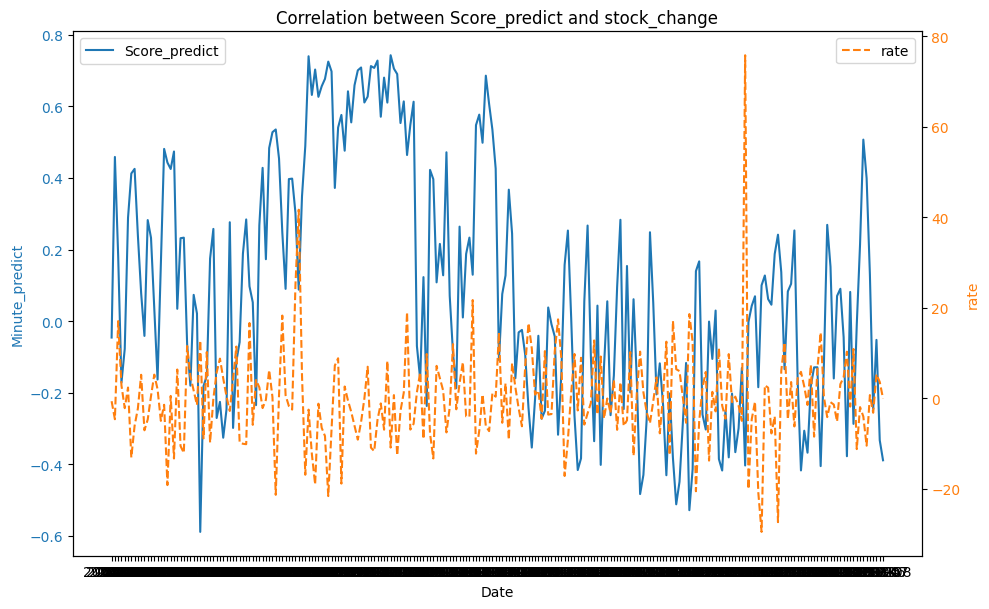

In [380]:
import matplotlib.pyplot as plt

dates = hyundai.korea_bank_df['YearMonth']
sentiment_scores = hyundai.korea_bank_df['score']
interest_rates = hyundai.korea_bank_df['stock_change']

# 그래프 초기화
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 y축 (Sentiment Score)
ax1.set_xlabel('Date')
ax1.set_ylabel('Minute_predict', color='tab:blue')
ax1.plot(dates, sentiment_scores, color='tab:blue', label='Score_predict')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# 두 번째 y축 (rate)
ax2 = ax1.twinx()  # twinx 함수로 두 번째 y축 생성
ax2.set_ylabel('rate', color='tab:orange')
ax2.plot(dates, interest_rates, color='tab:orange', label='rate', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.legend(loc='upper right')

# x축 레이블 설정
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Correlation between Score_predict and stock_change')
plt.show()

In [375]:
hyundai.stock_comparison_no_lasso_df.fillna(0, inplace = True)
hyundai.stock_comparison_no_lasso_df
correlation_no_lasso = hyundai.stock_comparison_no_lasso_df['no_Lasso_Score'].corr(hyundai.stock_comparison_no_lasso_df['stock_change'])

print(f"Correlation between 'no_Lasso_Score' and 'stock_change': {correlation_no_lasso}")

Correlation between 'no_Lasso_Score' and 'stock_change': -0.03512314530421054


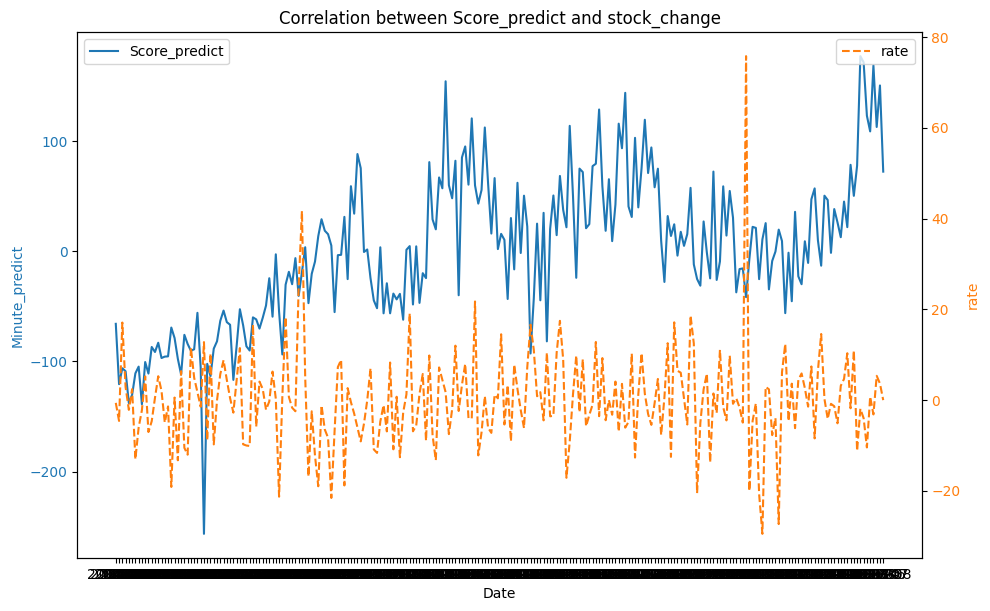

In [377]:
import matplotlib.pyplot as plt

dates = hyundai.stock_comparison_no_lasso_df['YearMonth']
sentiment_scores = hyundai.stock_comparison_no_lasso_df['no_Lasso_Score']
interest_rates = hyundai.stock_comparison_no_lasso_df['stock_change']

# 그래프 초기화
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 y축 (Sentiment Score)
ax1.set_xlabel('Date')
ax1.set_ylabel('Minute_predict', color='tab:blue')
ax1.plot(dates, sentiment_scores, color='tab:blue', label='Score_predict')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# 두 번째 y축 (rate)
ax2 = ax1.twinx()  # twinx 함수로 두 번째 y축 생성
ax2.set_ylabel('rate', color='tab:orange')
ax2.plot(dates, interest_rates, color='tab:orange', label='rate', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.legend(loc='upper right')

# x축 레이블 설정
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Correlation between Score_predict and stock_change')
plt.show()

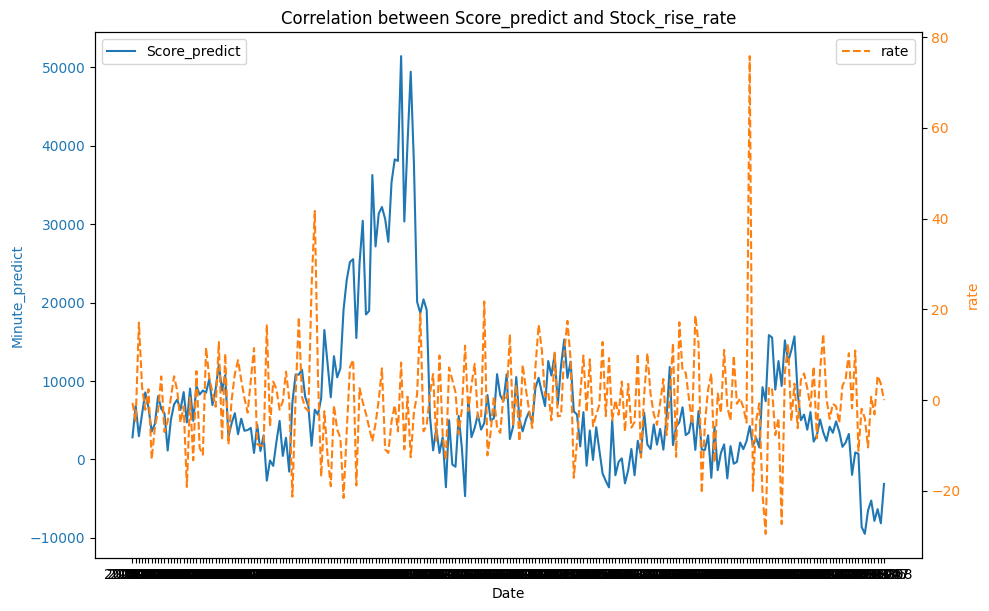

In [370]:
import matplotlib.pyplot as plt

dates = hyundai.stock_comparison_df['YearMonth']
sentiment_scores = hyundai.stock_comparison_df['Score']
interest_rates = hyundai.stock_comparison_df['stock_change']

# 그래프 초기화
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 y축 (Sentiment Score)
ax1.set_xlabel('Date')
ax1.set_ylabel('Minute_predict', color='tab:blue')
ax1.plot(dates, sentiment_scores, color='tab:blue', label='Score_predict')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# 두 번째 y축 (rate)
ax2 = ax1.twinx()  # twinx 함수로 두 번째 y축 생성
ax2.set_ylabel('rate', color='tab:orange')
ax2.plot(dates, interest_rates, color='tab:orange', label='rate', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.legend(loc='upper right')

# x축 레이블 설정
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Correlation between Score_predict and stock_change')
plt.show()

In [354]:
hyundai.accuracy
hyundai.stock_comparison_df
hyundai.stock_comparison_no_lasso_df
hyundai.korea_bank_df

,YearMonth,score,stock_change
0,2004-01,-0.045872,-0.600000
1,2004-02,0.458901,-4.580153
2,2004-03,0.181743,17.094972
3,2004-04,-0.171717,2.873563
4,2004-05,-0.077500,-2.137233
...,...,...,...
231,2023-04,0.130387,0.750000
232,2023-05,-0.245709,-3.147700
233,2023-06,-0.052336,5.357143
234,2023-07,-0.332865,3.648863


In [ ]:
import re

hyundai_top_5_percent = hyundai.all_df[hyundai.all_df['Target'] >= hyundai.all_df['Target'].quantile(0.95)]
hyundai_top_5_percent
topic_counts = hyundai_top_5_percent['lda_topics'].value_counts()
total_count = len(hyundai_top_5_percent)
topic_ratios = topic_counts / total_count
def get_top_words(lda_model):
    topic_words = {}
    for topic_id in lda_model.print_topics(num_words=6, num_topics = 30):
        
        topic_num = topic_id[0]
        topic_word = topic_id[1]
        result = re.sub(r'[^가-힣a-zA-Z\s]+', '', topic_word)
        topic_words[topic_num] = result
        
    return topic_words

# 각 주제별 상위 5개 단어 추출
lda_topics = get_top_words(hyundai.LDA_model)  # lda_model은 적절한 모델을 로드해야 합니다.

# 'lda_topic' 번호를 기반으로 각 주제의 상위 5개 단어를 매핑하여 'topic_word' 칼럼 생성

# 데이터프레임으로 변환
result_df = pd.DataFrame({'lda_topic': topic_ratios.index, 'ratio': topic_ratios.values})
result_df

# a = pd.DataFrame(lda_topics)
a = list(lda_topics.keys())
b = list(lda_topics.values())
data = {'lda_topic': a,
        'topic_word': b}
topic_word = pd.DataFrame(data)
FVE_dataframe = pd.merge(result_df, topic_word, on = 'lda_topic', how = 'left')

In [ ]:
FVE_dataframe

In [8]:
samsung.get_LDA(30, 42, 5)
samsung.get_Lasso_df()
samsung.Lasso_run(100, 10)
samsung.Lasso_run_accuracy()
samsung.article_score()
samsung.korea_bank_implement()

[(8, '0.040*"제품" + 0.019*"디자인" + 0.019*"냉장고" + 0.019*"혁신" + 0.019*"체험" + 0.019*"다양" + 0.018*"브랜드" + 0.017*"전시" + 0.016*"열" + 0.016*"소비자"'), (11, '0.025*"우스" + 0.020*"않" + 0.017*"없" + 0.011*"문제" + 0.010*"받" + 0.009*"대해" + 0.009*"법" + 0.008*"보" + 0.007*"입장" + 0.006*"위하"'), (6, '0.060*"부회장" + 0.036*"수사" + 0.032*"사건" + 0.029*"혐의" + 0.026*"재판" + 0.025*"받" + 0.020*"구속" + 0.019*"법원" + 0.019*"출석" + 0.019*"선고"'), (10, '0.046*"침" + 0.029*"미" + 0.022*"특허" + 0.018*"중단" + 0.015*"제재" + 0.015*"협상" + 0.010*"퀄컴" + 0.010*"조치" + 0.010*"보도" + 0.010*"소송"'), (16, '0.056*"지분" + 0.042*"보유" + 0.033*"주식" + 0.027*"주주" + 0.022*"지배구조" + 0.020*"매각" + 0.020*"공시" + 0.020*"합병" + 0.018*"그룹" + 0.016*"상속세"'), (5, '0.025*"상승" + 0.017*"전망" + 0.016*"보" + 0.015*"코스피" + 0.014*"시장" + 0.014*"증시" + 0.013*"가능성" + 0.012*"주가" + 0.012*"기대" + 0.011*"높"'), (14, '0.021*"청춘" + 0.018*"보" + 0.016*"출시" + 0.012*"공개" + 0.012*"더" + 0.011*"않" + 0.010*"크" + 0.009*"모델" + 0.008*"시리즈" + 0.008*"없"'), (0, '0.028*"수출" + 0.027*"달러" + 0.023*"가격" + 0.01

In [29]:
samsung.LDA_model

In [64]:
samsung.LDA_model.print_topics(num_words=5)
samsung.LDA_model.print_topics(num_words=5,num_topics=30)

[(0, '0.028*"수출" + 0.027*"달러" + 0.023*"가격" + 0.019*"경기" + 0.019*"크"'),
 (1, '0.042*"하락" + 0.041*"상승" + 0.034*"오르" + 0.026*"거래일" + 0.026*"외국인"'),
 (2, '0.073*"지급" + 0.038*"기초자산" + 0.038*"상품" + 0.035*"만기" + 0.030*"수익"'),
 (3, '0.039*"고객" + 0.027*"구매" + 0.026*"서비스" + 0.021*"제공" + 0.019*"할인"'),
 (4, '0.054*"투자" + 0.025*"수익률" + 0.025*"펀드" + 0.021*"etf" + 0.017*"주식"'),
 (5, '0.025*"상승" + 0.017*"전망" + 0.016*"보" + 0.015*"코스피" + 0.014*"시장"'),
 (6, '0.060*"부회장" + 0.036*"수사" + 0.032*"사건" + 0.029*"혐의" + 0.026*"재판"'),
 (7, '0.069*"부회장" + 0.019*"경영" + 0.017*"부사장" + 0.016*"사면" + 0.014*"참석"'),
 (8, '0.040*"제품" + 0.019*"디자인" + 0.019*"냉장고" + 0.019*"혁신" + 0.019*"체험"'),
 (9, '0.055*"주가" + 0.026*"주식" + 0.024*"종목" + 0.021*"시가총액" + 0.018*"배당"'),
 (10, '0.046*"침" + 0.029*"미" + 0.022*"특허" + 0.018*"중단" + 0.015*"제재"'),
 (11, '0.025*"우스" + 0.020*"않" + 0.017*"없" + 0.011*"문제" + 0.010*"받"'),
 (12, '0.035*"공급" + 0.023*"확대" + 0.021*"매출" + 0.019*"성장" + 0.019*"업체"'),
 (13, '0.019*"지역" + 0.013*"층" + 0.013*"캠퍼스" + 0.013*"

In [68]:
import re

samsung_top_5_percent = samsung.all_df[samsung.all_df['Target'] >= samsung.all_df['Target'].quantile(0.95)]
samsung_top_5_percent
topic_counts = samsung_top_5_percent['lda_topics'].value_counts()
total_count = len(samsung_top_5_percent)
topic_ratios = topic_counts / total_count
def get_top_words(lda_model):
    topic_words = {}
    for topic_id in lda_model.print_topics(num_words=6, num_topics = 30):
        
        topic_num = topic_id[0]
        topic_word = topic_id[1]
        result = re.sub(r'[^가-힣a-zA-Z\s]+', '', topic_word)
        topic_words[topic_num] = result
        
    return topic_words

# 각 주제별 상위 5개 단어 추출
lda_topics = get_top_words(samsung.LDA_model)  # lda_model은 적절한 모델을 로드해야 합니다.

# 'lda_topic' 번호를 기반으로 각 주제의 상위 5개 단어를 매핑하여 'topic_word' 칼럼 생성

# 데이터프레임으로 변환
result_df = pd.DataFrame({'lda_topic': topic_ratios.index, 'ratio': topic_ratios.values})
result_df

# a = pd.DataFrame(lda_topics)
a = list(lda_topics.keys())
b = list(lda_topics.values())
data = {'lda_topic': a,
        'topic_word': b}
topic_word = pd.DataFrame(data)
FVE_dataframe = pd.merge(result_df, topic_word, on = 'lda_topic', how = 'left')

In [69]:
FVE_dataframe

,lda_topic,ratio,topic_word
0,1,0.134805,하락 상승 오르 거래일 외국인 코스피
1,29,0.107205,뉴스 경제 종합 금지 무단 전재
2,21,0.096746,실적 영업이익 매출 전망 대비 증가
3,11,0.067403,우스 않 없 문제 받 대해
4,5,0.066531,상승 전망 보 코스피 시장 증시
5,23,0.055491,기술 서비스 제품 기능 적용 사용
6,19,0.053167,사업 기업 시장 글로벌 업계 위하
7,14,0.042998,청춘 보 출시 공개 더 않
8,3,0.035445,고객 구매 서비스 제공 할인 판매
9,6,0.034282,부회장 수사 사건 혐의 재판 받


In [60]:
lda_topics

{12: '공급  확대  매출  성장  업체',
 25: '금융  미  면  부동산  대출',
 24: '지원  위하  사업  임직원  통하',
 5: '상승  전망  보  코스피  시장',
 19: '사업  기업  시장  글로벌  업계',
 26: '시장  판매  제품  점유율  글로벌',
 14: '청춘  보  출시  공개  더',
 7: '부회장  경영  부사장  사면  참석',
 21: '실적  영업이익  매출  전망  대비',
 4: '투자  수익률  펀드  etf  주식',
 29: '뉴스  경제  종합  금지  무단',
 16: '지분  보유  주식  주주  지배구조',
 3: '고객  구매  서비스  제공  할인',
 20: '작품  스타  라이브  대회  아트',
 22: '투자  공장  생산  위하  규모',
 18: '기업  대기업  곳  가장  늘',
 27: '문  가족  홍  이사장  본부',
 8: '제품  디자인  냉장고  혁신  체험',
 13: '지역  층  캠퍼스  예정  규모',
 9: '주가  주식  종목  시가총액  배당'}

In [18]:
samsung.LDA_df

,Date,Content,stock,n_grams,tokens,ngram_token,num_w,lda_topics
0,2012-01-01,마켓포인트에 따르면 12월 다섯째주 외국인은 유가증권시장에서 삼성전자를 가장 많이...,삼성전자,[],"[시장, 포인트, 외국인, 가장, 많이, 샀, 순매수금액, 외국인, 순매수, 외국인...","[시장, 포인트, 외국인, 가장, 많이, 샀, 순매수금액, 외국인, 순매수, 외국인...",35,29
1,2012-01-01,마켓포인트에 따르면 12월 다섯째주 유가증권시장에서 개인 순매도 1위 종목은 외국...,삼성전자,[],"[시장, 포인트, 개인, 순매도, 종목, 외국인, 가장, 많이, 산, 순매도금액, ...","[시장, 포인트, 개인, 순매도, 종목, 외국인, 가장, 많이, 산, 순매도금액, ...",39,1
2,2012-01-01,- 아날로그TV 고객 6명 선정 스마트TV 증정 삼성전자는 오는 1월 셋째주부터 3...,삼성전자,[],"[고객, 선정, 증정, 오래, 바뀌, 가장, 오래, 찾, 이벤트, 실시, 밝히, 사...","[고객, 선정, 증정, 오래, 바뀌, 가장, 오래, 찾, 이벤트, 실시, 밝히, 사...",70,3
3,2012-01-01,- 모바일지급시스템 상용화 예상. IPO 관심- 태블릿 인기 지속. 더 가열될듯 지...,삼성전자,[],"[지급, 시스템, 상용화, 예상, 관심, 인기, 지속, 더, 가열, 글로벌, 정보기...","[지급, 시스템, 상용화, 예상, 관심, 인기, 지속, 더, 가열, 글로벌, 정보기...",164,19
4,2012-01-01,"- 코스피, 삼성전자·현대차 등 대형종목- 코스닥, 대형주·실적주 위주로 관심- 경...",삼성전자,"[글로벌/NNG;수요/NNG;감소/NNG, 건설/NNG;경기/NNG;침체/NNG, ...","[코스피, 종목, 코스닥, 대형주, 실적주, 위주, 관심, 경기, 우려, 안정, 종...","[글로벌/NNG;수요/NNG;감소/NNG, 건설/NNG;경기/NNG;침체/NNG, ...",244,5
...,...,...,...,...,...,...,...,...
68823,2022-12-30,내달 5일 美라스베이거스서 개막3100여개 전시관. 다녀갈 듯국내 삼성·SK·LG ...,삼성전자,[],"[미, 개막, 전시관, 다녀갈, 기업, 대거, 참석, 소프트, 복귀, 인류, 지속,...","[미, 개막, 전시관, 다녀갈, 기업, 대거, 참석, 소프트, 복귀, 인류, 지속,...",338,8
68824,2022-12-30,김한신 대표 “5년간 CAGR 40% 달성” 자신사업안정기 앞두고 새 먹거리 ‘디지...,삼성전자,"[적자/NNG;면하/VV;못하/VX, 성장/NNG;자신/NNG, 불확실성/NNG, ...","[성장률, 달성, 사업, 안정국면, 앞두, 먹거리, 추진, 신사업, 면역, 진단, ...","[적자/NNG;면하/VV;못하/VX, 성장/NNG;자신/NNG, 불확실성/NNG, ...",374,12
68825,2022-12-31,"""올해 모니터용 패널 출하량 8% 감소""탄탄한 수요 있지만…경기침체 못 피해이르면 ...",삼성전자,"[인플레이션/NNG;경기/NNG;침체/NNG, 업황/NNG;둔화/NNG, 수요/NN...","[출하량, 감소, 탄탄, 수요, 경기, 침체, 못, 피하, 이르, 회복, 가능성, ...","[인플레이션/NNG;경기/NNG;침체/NNG, 업황/NNG;둔화/NNG, 수요/NN...",197,26
68826,2022-12-31,"용량 확장성 특징인 CXL…삼성 CXL 기반 고용량 D램 개발SK하이닉스, CXL에...",삼성전자,"[성공/NNG;최대/NNG, 소비/NNG;개선/NNG]","[용량, 확장, 특징, 고용량, 개발, 연산, 기능, 더하, 맞불, 공개, 제품, ...","[성공/NNG;최대/NNG, 소비/NNG;개선/NNG, 용량, 확장, 특징, 고용량...",231,23


In [9]:
samsung.korea_bank_df
samsung.korea_bank_df.fillna(0, inplace = True)
samsung.korea_bank_df
correlation_no_lasso = samsung.korea_bank_df['score'].corr(samsung.korea_bank_df['stock_change'])

print(f"Correlation between 'bank_score' and 'stock_change': {correlation_no_lasso}")

Correlation between 'bank_score' and 'stock_change': -0.5286240970925747


In [13]:
samsung.stock_comparison_df.fillna(0, inplace = True)
samsung.stock_comparison_df
correlation = samsung.stock_comparison_df['Score'].corr(samsung.stock_comparison_df['stock_change'])

print(f"Correlation between 'Score' and 'stock_change': {correlation}")

Correlation between 'Score' and 'stock_change': -0.05234580860646492


In [14]:
samsung.stock_comparison_no_lasso_df.fillna(0, inplace = True)
samsung.stock_comparison_no_lasso_df
correlation = samsung.stock_comparison_no_lasso_df['no_Lasso_Score'].corr(samsung.stock_comparison_no_lasso_df['stock_change'])

print(f"Correlation between 'Score' and 'stock_change': {correlation}")


Correlation between 'Score' and 'stock_change': 0.019132451248720563


In [ ]:
samsung.stock_comparison_df.fillna(0, inplace = True)
samsung.stock_comparison_df
correlation = samsung.stock_comparison_df['Score'].corr(samsung.stock_comparison_df['stock_change'])

print(f"Correlation between 'Score' and 'stock_change': {correlation}")

In [28]:
celltrion.get_LDA(10, 42, 10)
celltrion.get_Lasso_df()
celltrion.Lasso_run(100, 10)
celltrion.Lasso_run_accuracy()
celltrion.article_score()
celltrion.korea_bank_implement()

KeyboardInterrupt: 

In [23]:
celltrion.korea_bank_df
celltrion.korea_bank_df.fillna(0, inplace = True)
celltrion.korea_bank_df
correlation_no_lasso = celltrion.korea_bank_df['score'].corr(celltrion.korea_bank_df['stock_change'])

print(f"Correlation between 'bank_score' and 'stock_change': {correlation_no_lasso}")

Correlation between 'bank_score' and 'stock_change': -0.360323343234788


In [14]:
hyundai_topics = hyundai.LDA_model.print_topics(num_words=10)
samsung_topics = samsung.LDA_model.print_topics(num_words=10)
celltrion_topics = celltrion.LDA_model.print_topics(num_words=10)
for topic in hyundai_topics:
    print(topic)

AttributeError: 'predict_stock' object has no attribute 'LDA_model'

In [27]:
hyundai

In [26]:
celltrion

In [12]:
len(hyundai_topics)

20

In [17]:
samsung_topics

[(12,
  '0.035*"공급" + 0.023*"확대" + 0.021*"매출" + 0.019*"성장" + 0.019*"업체" + 0.017*"부품" + 0.015*"기대" + 0.015*"시장" + 0.014*"생산" + 0.014*"사업"'),
 (2,
  '0.073*"지급" + 0.038*"기초자산" + 0.038*"상품" + 0.035*"만기" + 0.030*"수익" + 0.029*"els" + 0.024*"지수" + 0.023*"발행" + 0.022*"스텝" + 0.022*"대금"'),
 (1,
  '0.042*"하락" + 0.041*"상승" + 0.034*"오르" + 0.026*"거래일" + 0.026*"외국인" + 0.024*"코스피" + 0.021*"보" + 0.020*"기관" + 0.019*"내리" + 0.018*"종목"'),
 (9,
  '0.055*"주가" + 0.026*"주식" + 0.024*"종목" + 0.021*"시가총액" + 0.018*"배당" + 0.017*"오르" + 0.015*"시장" + 0.014*"개인" + 0.013*"거래" + 0.012*"코스닥"'),
 (20,
  '0.027*"작품" + 0.021*"스타" + 0.020*"라이브" + 0.017*"대회" + 0.015*"아트" + 0.015*"캠페인" + 0.013*"미술관" + 0.013*"침" + 0.012*"선수" + 0.011*"팬"'),
 (3,
  '0.039*"고객" + 0.027*"구매" + 0.026*"서비스" + 0.021*"제공" + 0.019*"할인" + 0.018*"판매" + 0.016*"진행" + 0.014*"혜택" + 0.014*"상품" + 0.013*"사전"'),
 (19,
  '0.023*"사업" + 0.020*"기업" + 0.017*"시장" + 0.016*"글로벌" + 0.012*"업계" + 0.012*"위하" + 0.011*"크" + 0.009*"기술" + 0.009*"전략" + 0.009*"경쟁"'),
 (28,
  '0.021

In [13]:
for topic in hyundai_topics:
    print(topic)

(23, '0.028*"않" + 0.025*"없" + 0.021*"문제" + 0.018*"받" + 0.014*"대해" + 0.011*"관계자" + 0.011*"보" + 0.010*"입장" + 0.010*"가능성" + 0.009*"조치"')
(29, '0.027*"파업" + 0.023*"노사" + 0.022*"협상" + 0.018*"임금" + 0.013*"교섭" + 0.012*"요구" + 0.012*"합의" + 0.009*"단협" + 0.008*"고용" + 0.008*"위하"')
(5, '0.043*"실적" + 0.035*"매출" + 0.034*"영업이익" + 0.028*"전망" + 0.028*"증가" + 0.024*"대비" + 0.022*"개선" + 0.020*"예상" + 0.014*"기대" + 0.012*"기록"')
(15, '0.034*"기술" + 0.028*"위하" + 0.018*"협력" + 0.017*"지원" + 0.017*"개발" + 0.014*"미래" + 0.013*"계획" + 0.013*"사업" + 0.013*"통하" + 0.012*"활용"')
(1, '0.052*"상품" + 0.043*"공모" + 0.031*"만기" + 0.030*"상장" + 0.028*"지급" + 0.026*"수익" + 0.025*"기초자산" + 0.025*"수수료" + 0.023*"els" + 0.023*"최초"')
(28, '0.047*"중고차" + 0.044*"차" + 0.034*"평가" + 0.031*"브랜드" + 0.025*"선정" + 0.025*"오르" + 0.022*"받" + 0.019*"수상" + 0.017*"품질" + 0.016*"최고"')
(13, '0.067*"그룹" + 0.056*"채용" + 0.029*"배포" + 0.025*"부사장" + 0.024*"금지" + 0.024*"종합" + 0.021*"선임" + 0.019*"부회장" + 0.018*"승진" + 0.018*"경제"')
(27, '0.157*"외국인" + 0.153*"계약" + 0.092*"캠페인"

In [26]:
for topic in samsung_topics:
    print(topic)

(8, '0.040*"제품" + 0.019*"디자인" + 0.019*"냉장고" + 0.019*"혁신" + 0.019*"체험" + 0.019*"다양" + 0.018*"브랜드" + 0.017*"전시" + 0.016*"열" + 0.016*"소비자"')
(24, '0.025*"지원" + 0.018*"위하" + 0.011*"사업" + 0.011*"임직원" + 0.011*"통하" + 0.010*"사회" + 0.010*"운영" + 0.010*"진행" + 0.010*"인력" + 0.009*"인재"')
(10, '0.046*"침" + 0.029*"미" + 0.022*"특허" + 0.018*"중단" + 0.015*"제재" + 0.015*"협상" + 0.010*"퀄컴" + 0.010*"조치" + 0.010*"보도" + 0.010*"소송"')
(20, '0.027*"작품" + 0.021*"스타" + 0.020*"라이브" + 0.017*"대회" + 0.015*"아트" + 0.015*"캠페인" + 0.013*"미술관" + 0.013*"침" + 0.012*"선수" + 0.011*"팬"')
(19, '0.023*"사업" + 0.020*"기업" + 0.017*"시장" + 0.016*"글로벌" + 0.012*"업계" + 0.012*"위하" + 0.011*"크" + 0.009*"기술" + 0.009*"전략" + 0.009*"경쟁"')
(14, '0.021*"청춘" + 0.018*"보" + 0.016*"출시" + 0.012*"공개" + 0.012*"더" + 0.011*"않" + 0.010*"크" + 0.009*"모델" + 0.008*"시리즈" + 0.008*"없"')
(6, '0.060*"부회장" + 0.036*"수사" + 0.032*"사건" + 0.029*"혐의" + 0.026*"재판" + 0.025*"받" + 0.020*"구속" + 0.019*"법원" + 0.019*"출석" + 0.019*"선고"')
(13, '0.019*"지역" + 0.013*"층" + 0.013*"캠퍼스" + 0.013*

In [27]:
for topic in celltrion_topics:
    print(topic)

(0, '0.382*"코로나" + 0.083*"바이러스" + 0.042*"변이" + 0.027*"신종" + 0.021*"확산" + 0.013*"중화" + 0.011*"진단" + 0.010*"오미크론" + 0.010*"확인" + 0.009*"효과"')
(1, '0.009*"경제" + 0.008*"기업" + 0.007*"미" + 0.007*"규제" + 0.006*"없" + 0.006*"산업" + 0.005*"안" + 0.005*"투자" + 0.005*"금융" + 0.005*"사회"')
(2, '0.019*"코스닥" + 0.017*"시장" + 0.016*"상승" + 0.016*"코스피" + 0.015*"주가" + 0.014*"보" + 0.012*"증시" + 0.011*"크" + 0.010*"하락" + 0.010*"종목"')
(3, '0.059*"공매도" + 0.026*"코스닥" + 0.026*"종목" + 0.017*"수익률" + 0.017*"잔고" + 0.017*"투자" + 0.016*"지수" + 0.016*"상장" + 0.013*"편입" + 0.013*"펀드"')
(4, '0.042*"매출" + 0.036*"증가" + 0.030*"영업이익" + 0.029*"대비" + 0.020*"늘" + 0.018*"실적" + 0.017*"기록" + 0.015*"감소" + 0.013*"시가총액" + 0.012*"기업"')
(5, '0.021*"시장" + 0.015*"매출" + 0.015*"기대" + 0.014*"전망" + 0.011*"주가" + 0.011*"성장" + 0.011*"예상" + 0.011*"실적" + 0.011*"투자" + 0.010*"트리"')
(6, '0.018*"개발" + 0.011*"허가" + 0.010*"받" + 0.008*"환자" + 0.008*"기업" + 0.008*"글로벌" + 0.008*"위하" + 0.008*"상" + 0.008*"밝히" + 0.007*"시장"')
(7, '0.039*"종목" + 0.037*"오르" + 0.030*"상승" + 0.02

In [272]:
hyundai.stock_comparison_df
hyundai.korea_bank_df

,YearMonth,Score,stock_change
0,2004-01,305.014086,-0.600000
1,2004-02,-44.457725,-4.580153
2,2004-03,-2163.408785,17.094972
3,2004-04,1422.380143,0.336323
4,2004-05,1075.452347,NaN


In [227]:
hyundai.stock_comparison_df

,YearMonth,Score,stock_change
0,2004-01,305.014086,-0.600000
1,2004-02,-44.457725,-4.580153
2,2004-03,-2163.408785,17.094972
3,2004-04,1422.380143,0.336323
4,2004-05,1075.452347,NaN


In [244]:
from collections import Counter
def expand_ngrams(ngram_list, up_down):
    counts = Counter()
    counts.update(ngram_list)
    # print(counts)

    ngrams_expanded = []
    up_counts = []
    down_counts = []
    for ngram, count in counts.items():
        ngrams_expanded.append(ngram)
        if up_down == 1:
            up_counts.append(count)
            down_counts.append(0)
        else:
            up_counts.append(0)
            down_counts.append(count)

    return pd.DataFrame({'ngram': ngrams_expanded, 'up': up_counts, 'down': down_counts})

def korea_bank_implement():
    korea_df = hyundai.all_df[['Date','Close','ngram_token','1month_updown']]
    # korea_df['ngram_token'] = korea_df['ngram_token'].apply(ast.literal_eval)
    
    result = pd.concat([expand_ngrams(row['ngram_token'], row['1month_updown']) for _, row in korea_df.iterrows()])
    # print(result)
    result = result.groupby('ngram').sum().reset_index()
    # print(result)
    # 없는 단어가 있을경우 무한대가 될 수 있으므로 1을 더해준다.
    result['up'] += 1
    result['down'] += 1

    result['p_score'] = (result['up']/result['up'].sum())/(result['down']/result['down'].sum())

    result['sentiment'] = result['p_score'].apply(lambda x: '긍정' if x >= 1.3 else ('부정' if x <= 1/1.3 else '중립'))
    positive = set(list(result[result['sentiment'] == '긍정']['ngram']))
    # print(positive)
    negative = set(list(result[result['sentiment'] == '부정']['ngram']))
    # print(negative)
    monthly_tokens = korea_df.groupby(korea_df['Date'].dt.strftime('%Y-%m'))['ngram_token'].sum()
    monthly_df = monthly_tokens.reset_index()
    monthly_df.columns = ['YearMonth', 'ngram_token']
    # print(monthly_tokens)
    
    def calculate_sentiment_score(ngram_token):
        positive_count = 0
        negative_count = 0
        for token in ngram_token:
            if token in positive:
                positive_count += 1
            if token in negative:
                negative_count += 1
        return (positive_count - negative_count) / (positive_count + negative_count)
    monthly_df['score'] = monthly_df['ngram_token'].apply(calculate_sentiment_score)
    return monthly_df
# korea_bank_implement()
monthly_tokens = korea_bank_implement()


In [245]:
monthly_tokens

,YearMonth,ngram_token,score
0,2004-01,"[경제/NNG;성장률/NNG;긍정적/VAX, 긍정적/VAX;경기/NNG;회복/NNG...",-0.359749
1,2004-02,"[연체율/NNG;급등/NNG, 초고속/NNG;성장/NNG, 환경/NNG;악화/NNG...",0.405987
2,2004-03,"[국가, 유치, 전, 뜨겁, 가운데, 달러, 규모, 공장, 부지, 선정, 보, 파이...",-0.077042
3,2004-04,"[업계, 최초, 사내, 판매, 검색, 시스템, 구축, 밝히, 업무, 웹, 환경, 위...",-0.467729
4,2004-05,"[생산능력/NNG;확충/NNG, 성장/NNG, 사업, 담당, 고문, 부회장, 선임,...",-0.392107


In [179]:
def expand_ngrams(ngram_list, up_down):
    counts = Counter()
    counts.update(ngram_list)
    # print(counts)

    ngrams_expanded = []
    up_counts = []
    down_counts = []
    for ngram, count in counts.items():
        ngrams_expanded.append(ngram)
        if up_down == 1:
            up_counts.append(count)
            down_counts.append(0)
        else:
            up_counts.append(0)
            down_counts.append(count)

    return pd.DataFrame({'ngram': ngrams_expanded, 'up': up_counts, 'down': down_counts})

def korea_bank_implement(all_df):
    korea_df = all_df[['Date','Close','ngram_token','1month_updown']]
    # korea_df['ngram_token'] = korea_df['ngram_token'].apply(ast.literal_eval)
    result = pd.concat([expand_ngrams(row['ngram_token'], row['1month_updown']) for _, row in korea_df.iterrows()])
    result = result.groupby('ngram').sum().reset_index()
    # 없는 단어가 있을경우 무한대가 될 수 있으므로 1을 더해준다.
    result['up'] +=1
    result['down'] += 1

    result['p_score'] = (result['up']/result['up'].sum())/(result['down']/result['down'].sum())

    result['sentiment'] = result['p_score'].apply(lambda x: '긍정' if x >= 1.3 else ('부정' if x <= 1/1.3 else '중립'))
    positive = set(list(result[result['sentiment'] == '긍정']['ngram']))
    negative = set(list(result[result['sentiment'] == '부정']['ngram']))
    monthly_tokens = korea_df.groupby(korea_df['Date'].dt.strftime('%Y-%m'))['ngram_token'].sum()
    def calculate_sentiment_score(tokens):
        scores = []
        for sentence_ngrams in tokens:
            # 문장 내에서 긍정 단어와 부정 단어의 출현 빈도 계산
            positive_count = sum(1 for ngram in sentence_ngrams if ngram in positive)
            negative_count = sum(1 for ngram in sentence_ngrams if ngram in negative)
            
            # 감정 점수 계산
            if (positive_count + negative_count) != 0:
                sentiment_score = (positive_count - negative_count) / (positive_count + negative_count)
            else:
                sentiment_score = 0  # 분모가 0이면 0으로 처리
            
            scores.append(sentiment_score)
        
        return scores
    monthly_sentiment_scores = monthly_tokens.apply(lambda x: for i in)
    print(monthly_sentiment_scores)
korea_bank_implement(hyundai.all_df)

NameError: name 'Counter' is not defined

## 모델 생성

In [45]:
#모델 생성
hyundai_model, hyundai_text, hyundai_corpus = LDA.get_LDA(hyundai_text, 'Content', 50, 42, 10)
samsung_model, samsung_text, samsung_corpus = LDA.get_LDA(samsung_text, 'Content', 50, 42, 10)
celltrion_model, celltrion_text, celltrion_corpus = LDA.get_LDA(celltrion_text, 'Content', 50, 42, 10)

In [110]:
hyundai_text

,Date,Content,stock,n_grams,tokens,ngram_token,num_w,lda_topics
0,2004-01-02,갑신년 첫날 주식시장에서 현대자동차가 52주 최고가 행진을 벌였다. 현대자동차는 ...,현대차,"[경제/NNG;성장률/NNG;긍정적/VAX, 긍정적/VAX;경기/NNG;회복/NNG...","[갑신, 첫날, 주식시장, 최고가, 행진, 벌였, 거래소, 거래일, 급등, 거래, ...","[경제/NNG;성장률/NNG;긍정적/VAX, 긍정적/VAX;경기/NNG;회복/NNG...",318,7
1,2004-01-02,"현대자동차는 2일 지난해 12월 판매실적이 내수 4만8820대, 수출 14만220...",현대차,"[수출/NNG;증가/NNG;최대/NNG, 판매대수/NNG;증가/NNG, 실적/NNG...","[판매, 실적, 내수, 수출, 기록, 밝히, 판매대수, 대비, 증가, 같, 달, 비...","[수출/NNG;증가/NNG;최대/NNG, 판매대수/NNG;증가/NNG, 실적/NNG...",75,47
2,2004-01-02,2일 거래소시장에서 현대자동차가 신고가 행진을 벌이고 있다. 올해 매출증대와 투자...,현대차,[투자/NNG;확대/NNG;어렵/VA],"[거래소, 신고가, 행진, 벌이, 매출, 증대, 투자, 확대, 천명, 관심, 쏠리,...","[투자/NNG;확대/NNG;어렵/VA, 거래소, 신고가, 행진, 벌이, 매출, 증대...",67,36
3,2004-01-02,"현대자동차는 2일 실적발표를 통해 올해 판매실적이 196만4835대를 기록, 전년...",현대차,[],"[실적발표, 통하, 판매, 실적, 기록, 대비, 증가, 밝히]","[실적발표, 통하, 판매, 실적, 기록, 대비, 증가, 밝히]",8,47
4,2004-01-02,현대·기아차그룹은 2일 오전 8시 양재동 사옥에서 임직원들이 참석한 가운데 정몽구...,현대차,"[연구개발/NNG;투자/NNG;확대/NNG, 회복/NNG;예상/NNG;늦/VA, 기...","[그룹, 사옥, 임직원, 참석, 가운데, 주재, 신년, 시무식, 가졌, 신년사, 전...","[연구개발/NNG;투자/NNG;확대/NNG, 회복/NNG;예상/NNG;늦/VA, 기...",561,20
...,...,...,...,...,...,...,...,...
2791,2023-08-25,Research Center 1 자동차 Comment |자동차/...,현대차,"[펀더멘털/NNG;악화/NNG, 예상/NNG;불확실성/NNG, 판매/NNG;급감/N...","[업계, 변화, 전기차, 기술, 협력, 확산, 전기차, 핵심, 기술, 활용, 신차,...","[펀더멘털/NNG;악화/NNG, 예상/NNG;불확실성/NNG, 판매/NNG;급감/N...",333,37
2792,2023-08-29,2023년 8월 29일 산업코멘트 자동차(Positive) EV Price-...,현대차,"[판매가격/NNG;인하/NNG, 예상/NNG;부정적/VAX, 판매/NNG;증가/NN...","[산업, 경쟁, 촉발, 가격, 인하, 경쟁, 시작, 글로벌, 시장, 가격, 인하, ...","[판매가격/NNG;인하/NNG, 예상/NNG;부정적/VAX, 판매/NNG;증가/NN...",898,37
2793,2023-08-31,산업분석 2023.08.31 www.daishin.com Issue &...,현대차,"[수요/NNG;우려/NNG, 외부/NNG;압력/NNG, 자신/NNG, 하회/NNG]","[산업분석, 공급망, 강화, 유증, 참여, 투자의견, 비중, 확대, 유지, 유증, ...","[수요/NNG;우려/NNG, 외부/NNG;압력/NNG, 자신/NNG, 하회/NNG,...",397,15
2794,2023-08-31,2023년 8월 31일 I 산업분석 자동차 유럽 자동차 7월: 현대차/...,현대차,"[판매/NNG;증가/NNG, 양호/NNG;부진/NNG, 판매/NNG;회복/NNG, ...","[산업분석, 소매, 판매, 증가, 시장점유율, 하락, 하락, 양사, 판매, 증가, ...","[판매/NNG;증가/NNG, 양호/NNG;부진/NNG, 판매/NNG;회복/NNG, ...",488,15


In [17]:

hyundai_topics = hyundai_model.print_topics(num_words=10)
samsung_topics = samsung_model.print_topics(num_words=10)
celltrion_topics = celltrion_model.print_topics(num_words=10)

# for topic in hyundai_topics:
#     print(topic)

# for topic in samsung_topics:
#     print(topic)

# for topic in celltrion_topics:
#     print(topic)


NameError: name 'hyundai_model' is not defined

In [16]:
hyundai_topics

NameError: name 'hyundai_topics' is not defined

# LASSO 회귀 위한 데이터 전처리

In [81]:
def process_stock_data(df):
    unique_stocks = df['stock'].unique()  # 주식명(stock)의 고유한 값들을 가져옴    
    processed_dfs = []  # 처리된 데이터프레임들을 저장할 리스트
    
    for stock_name in unique_stocks:
        stock_df = df[df['stock'] == stock_name].copy()  # 주식명에 해당하는 부분을 선택하여 복사
        
        ### 주가 상승 예측 모델 생성 위한 1일 1주일 1달 3달 6달 1년 뒤 상승여부 컬럼 만들기(종가 기준)
        stock_df['1day_updown'] = (stock_df['Close'].shift(-1) > stock_df['Close']).astype(int)
        stock_df['1week_updown'] = (stock_df['Close'].shift(-5) > stock_df['Close']).astype(int)
        stock_df['1month_updown'] = (stock_df['Close'].shift(-20) > stock_df['Close']).astype(int)  # 가정: 1달은 20 영업일로 계산
        stock_df['3month_updown'] = (stock_df['Close'].shift(-60) > stock_df['Close']).astype(int)  # 가정: 3달은 60 영업일로 계산
        stock_df['6month_updown'] = (stock_df['Close'].shift(-120) > stock_df['Close']).astype(int)  # 가정: 6달은 120 영업일로 계산
        stock_df['1year_updown'] = (stock_df['Close'].shift(-240) > stock_df['Close']).astype(int)
        ### 논문의 거래량 조정 방법인 100거래일 최저 거래량 빼주기(0이 안 나오게끔 0.9를 곱해서 보정 해주었음)
        # minus = stock_df['Volume'].rolling(window=100).min()
        # minus.fillna(method='bfill', inplace=True) # 뒤의 값을 통해서 결측값을 채우기(첫 99일 동안은 nan이 나오기 때문)
        # minus = minus * 0.1
        # stock_df['Target'] = stock_df['Volume'] - minus
        
        ## 주말 공휴일 등, 거래되지 않은 날의 주가 및 거래 데이터를 앞의 날의 정보로 채워 넣기
        stock_df['Date'] = pd.to_datetime(stock_df['Date'])
        all_dates = pd.date_range(start=min(stock_df['Date']), end=max(stock_df['Date']))  # 모든 날짜 생성
        stock_df = stock_df.set_index('Date').reindex(all_dates)  # 날짜 인덱스 재설정 및 빈 날짜 생성
        stock_df = stock_df.fillna(method='ffill')  # 빈 값을 앞쪽으로 채우기
                  
       
        processed_dfs.append(stock_df)
    
    # 모든 데이터프레임을 병합
    result_df = pd.concat(processed_dfs, axis=0)
    result_df = result_df.reset_index()
    result_df = result_df.rename(columns={'index': 'Date'})

    # 예측을 위한 수정 거래량 구하는 코드
    

    return result_df

filled_df = process_stock_data(semiconduct)
filled_df[:30]

,Date,Open,High,Low,Close,Volume,Change,stock,1day_updown,1week_updown,1month_updown,3month_updown,6month_updown,1year_updown,Target
0,2008-01-02,11180.0,11200.0,10840.0,10880.0,18047200.0,-0.021583,삼성전자,1.0,0.0,1.0,1.0,1.0,0.0,16988035.0
1,2008-01-03,10760.0,11060.0,10640.0,10920.0,19346500.0,0.003676,삼성전자,0.0,0.0,1.0,1.0,1.0,0.0,18287335.0
2,2008-01-04,10920.0,10960.0,10760.0,10780.0,17997350.0,-0.012821,삼성전자,0.0,0.0,1.0,1.0,1.0,0.0,16938185.0
3,2008-01-05,10920.0,10960.0,10760.0,10780.0,17997350.0,-0.012821,삼성전자,0.0,0.0,1.0,1.0,1.0,0.0,16938185.0
4,2008-01-06,10920.0,10960.0,10760.0,10780.0,17997350.0,-0.012821,삼성전자,0.0,0.0,1.0,1.0,1.0,0.0,16938185.0
5,2008-01-07,10360.0,10480.0,10340.0,10380.0,39787200.0,-0.037106,삼성전자,0.0,1.0,1.0,1.0,1.0,0.0,38728035.0
6,2008-01-08,10380.0,10480.0,10320.0,10320.0,24783700.0,-0.005780,삼성전자,1.0,1.0,1.0,1.0,1.0,0.0,23724535.0
7,2008-01-09,10340.0,10580.0,10260.0,10500.0,23865450.0,0.017442,삼성전자,0.0,1.0,1.0,1.0,1.0,0.0,22806285.0
8,2008-01-10,10439.0,10580.0,10320.0,10320.0,31551350.0,-0.017143,삼성전자,0.0,1.0,1.0,1.0,1.0,0.0,30492185.0
9,2008-01-11,10360.0,10520.0,10220.0,10320.0,23425150.0,0.000000,삼성전자,1.0,1.0,1.0,1.0,1.0,0.0,22365985.0


In [92]:
semiconduct

,Date,Open,High,Low,Close,Volume,Change,stock
0,2008-01-02,11180,11200,10840,10880,18047200,-0.021583,삼성전자
1,2008-01-03,10760,11060,10640,10920,19346500,0.003676,삼성전자
2,2008-01-04,10920,10960,10760,10780,17997350,-0.012821,삼성전자
3,2008-01-07,10360,10480,10340,10380,39787200,-0.037106,삼성전자
4,2008-01-08,10380,10480,10320,10320,24783700,-0.005780,삼성전자
...,...,...,...,...,...,...,...,...
25052,2023-08-25,1610,1623,1583,1592,1358835,-0.023912,KEC
25053,2023-08-28,1593,1620,1590,1617,812331,0.015704,KEC
25054,2023-08-29,1611,1692,1611,1667,2233987,0.030921,KEC
25055,2023-08-30,1697,1890,1678,1726,13121656,0.035393,KEC


In [98]:
import stockdata_process
importlib.reload(stockdata_process)
hyundai_model_df = stockdata_process.get_analyze_df(hyundai_text, car)
samsung_model_df = stockdata_process.get_analyze_df(samsung_text, semiconduct)
celltrion_model_df = stockdata_process.get_analyze_df(celltrion_text, bio)

In [101]:
semiconduct[semiconduct['stock'] == '삼성전자']

,Date,Open,High,Low,Close,Volume,Change,stock
0,2008-01-02,11180,11200,10840,10880,18047200,-0.021583,삼성전자
1,2008-01-03,10760,11060,10640,10920,19346500,0.003676,삼성전자
2,2008-01-04,10920,10960,10760,10780,17997350,-0.012821,삼성전자
3,2008-01-07,10360,10480,10340,10380,39787200,-0.037106,삼성전자
4,2008-01-08,10380,10480,10320,10320,24783700,-0.005780,삼성전자
...,...,...,...,...,...,...,...,...
3870,2023-08-25,67100,67400,66900,67100,7032462,-0.016129,삼성전자
3871,2023-08-28,66800,67000,66500,66800,5824628,-0.004471,삼성전자
3872,2023-08-29,66900,67200,66600,66800,9114352,0.000000,삼성전자
3873,2023-08-30,67300,67700,67100,67100,9181223,0.004491,삼성전자


In [99]:
samsung_model_df['Target']

0        10944900.0
1        10944900.0
2        10944900.0
3        10944900.0
4        10944900.0
            ...    
70515    13174578.0
70516    13174578.0
70517    15044463.0
70518     9181223.0
70519    15964630.0
Name: Target, Length: 70520, dtype: float64

In [96]:
print(filled_df['Target'][:30])
print('===========================================')
samsung_model_df['Target'] = filled_df[filled_df['stock']=='삼성전자']['Target']

0     16988035.0
1     18287335.0
2     16938185.0
3     16938185.0
4     16938185.0
5     38728035.0
6     23724535.0
7     22806285.0
8     30492185.0
9     22365985.0
10    22365985.0
11    22365985.0
12    21107835.0
13    39224785.0
14    48388935.0
15    41154735.0
16    34527235.0
17    34527235.0
18    34527235.0
19    24025885.0
20    42154485.0
21    35244685.0
22    26842835.0
23    25048335.0
24    25048335.0
25    25048335.0
26    26154035.0
27    20412085.0
28    34710235.0
29    45707935.0
Name: Target, dtype: float64


In [57]:
#거래량 정규화 논문 100거래일 최저거래량으로 빼줘서 0일 경우에는 보정
#일자별로 num_w를 주제별로 다 더하고 그러면 20개컬럼(input)을 1개 거래량 컬럼(output) -> model
# peakday 단어수들 20개컬럼 -> 모델 넣어요 -> output 일자별 거래량이랑 output비교 output이 일자별 거래량의 30%이상일 경우 성공으로 간주
# 성공으로 간주된 날이 토요타의 경우 70%, 꽤많은 기업들이 8-90%

lasso_df = pd.merge(hyundai, filled_df, how='left', on=['stock','Date'])

In [74]:
def make_lasso_df(df):
    df = df[['Date','lda_topics','num_w','Target']]
    result_df = df.pivot_table(index=['Date', 'Target'], columns='lda_topics', values='num_w', aggfunc='sum').reset_index()
    result_df = result_df.fillna(0)
    return result_df
hyundai_lasso = make_lasso_df(hyundai_model_df)
samsung_lasso = make_lasso_df(samsung_model_df)
celltrion_lasso = make_lasso_df(celltrion_model_df)
# lasso_hyundai = hyundai_model_df[['Date','lda_topics','num_w','Target']]
# # result_df = df.groupby(['Date', 'lda_topics']).agg({'num_w': 'sum'}).reset_index()
# # result_df
# result_df = df.pivot_table(index=['Date', 'Target'], columns='lda_topics', values='num_w', aggfunc='sum').reset_index()

# # 컬럼명 변경 (lda_topic의 숫자를 직접 명시하려면 컬럼명을 수동으로 수정)
# # result_df.columns = ['Date', 'Target'] + ['lda_topic_' + str(col) for col in result_df.columns[2:]]

# # NaN 값 0으로 채우기
# result_df = result_df.fillna(0)

# # 결과 출력
# result_df.columns

In [106]:
import Lasso
hyundai_analyze = Lasso.lasso(hyundai_lasso, 'hyundai')
samsung_analyze = Lasso.lasso(samsung_lasso, 'samsung')
celltrion_analyze = Lasso.lasso(celltrion_lasso, 'celltrion')

In [ ]:
hyundai_analze.run_lasso(1,10,)

In [79]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer

# 데이터프레임 생성 (앞서 생성한 데이터프레임을 사용)
# 이 데이터프레임에는 Date, lda_topic_0, lda_topic_1, ..., lda_topic_19, target 컬럼이 있어야 합니다.

# Feature(독립변수)와 Target(종속변수)를 나눕니다.
X = result_df.drop(columns=['Date', 'Target'])  # Feature로 lda_topic 컬럼들을 사용
y = result_df['Target']  # Target으로 'target' 컬럼을 사용

# Lasso 회귀 모델 생성
lasso_model = Lasso(alpha=1.0)  # alpha는 L1 규제 강도 조절

# 100회의 10겹 교차 검증 수행
num_cv_iterations = 100
cv_object = KFold(n_splits=10, shuffle=True, random_state=42)

# 교차 검증을 통한 모델 평가 (MSE를 사용하여)
scorer = make_scorer(mean_squared_error, greater_is_better=False)
mse_scores = cross_val_score(lasso_model, X, y, cv=cv_object, scoring='neg_mean_squared_error', n_jobs=-1)
mse_scores = -mse_scores  # 스코어 값은 양수로 변환

# 각 교차 검증에서의 MSE 평균과 표준편차 출력
print(f"Mean MSE: {mse_scores.mean()}")
print(f"Std MSE: {mse_scores.std()}")

UnicodeEncodeError: 'ascii' codec can't encode characters in position 18-20: ordinal not in range(128)

In [75]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 데이터프레임 생성 (앞서 생성한 데이터프레임을 사용)
# 이 데이터프레임에는 Date, lda_topic_0, lda_topic_1, ..., lda_topic_19, target 컬럼이 있어야 합니다.

# Feature(독립변수)와 Target(종속변수)를 나눕니다.
X = samsung_lasso.drop(columns=['Date', 'Target'])  # Feature로 lda_topic 컬럼들을 사용
y = samsung_lasso['Target']  # Target으로 'target' 컬럼을 사용

# 데이터를 학습용과 테스트용으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso 회귀 모델 생성 및 학습
lasso_model = Lasso(alpha=1.0)  # alpha는 L1 규제 강도 조절
lasso_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = lasso_model.predict(X_test)

# 모델 평가 (예시로 MSE와 R-squared 사용)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 45923845297879.07
R-squared (R2): 0.03654097750194807


In [233]:
from sklearn.metrics import accuracy_score

top_5_percent = samsung_lasso[samsung_lasso['Target'] >= samsung_lasso['Target'].quantile(0.95)]
top_5_percent
X = top_5_percent.iloc[:, 2:52]
top_5_percent['Target_predict'] = lasso_model.predict(X)
threshold = 0.3
top_5_percent['Success'] = top_5_percent['Target_predict'] >= (top_5_percent['Target'] * (threshold))

# 정확도 계산
accuracy = accuracy_score(top_5_percent['Success'], [True] * len(top_5_percent))
print(accuracy)

0.004464285714285714


C:\Users\서울디지털인재개발원\AppData\Local\Temp\ipykernel_19740\2646989288.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_percent['Target_predict'] = lasso_model.predict(X)
C:\Users\서울디지털인재개발원\AppData\Local\Temp\ipykernel_19740\2646989288.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_percent['Success'] = top_5_percent['Target_predict'] >= (top_5_percent['Target'] * (threshold))


In [61]:
accuracy

0.5491071428571429

In [63]:
samsung_lasso

lda_topics,Date,Target,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,2008-01-18,690544.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2008-01-21,480517.7,0.0,0.0,737.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008-01-24,536856.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2008-01-25,500966.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008-02-01,545858.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,2023-08-14,8535140.9,0.0,0.0,611.0,0.0,0.0,0.0,0.0,0.0,...,0.0,390.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4475,2023-08-16,12357375.9,0.0,0.0,2732.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,440.0,0.0,0.0,0.0
4476,2023-08-24,14227260.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4477,2023-08-30,8598760.2,0.0,0.0,3945.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
top_5_percent

NameError: name 'top_5_percent' is not defined